In [101]:
import numpy as np
import pandas as pd
import sympy
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

plt.style.use("../mpl styles/dracula.mplstyle")

In [125]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def learn(x, y, w_init=1, b_init=1, alpha=0.1, num_iter=100):
    w = torch.tensor(float(w_init), requires_grad=True)
    b = torch.tensor(float(b_init), requires_grad=True)
    for _ in range(num_iter):
        y_hat = sigmoid(w * x + b)
        loss = torch.mean(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat))
        loss.backward()
        dw = w.grad
        db = b.grad
        w = torch.tensor(w - alpha * dw, requires_grad=True)
        b = torch.tensor(b - alpha * db, requires_grad=True)
    
    return w.detach(), b.detach()

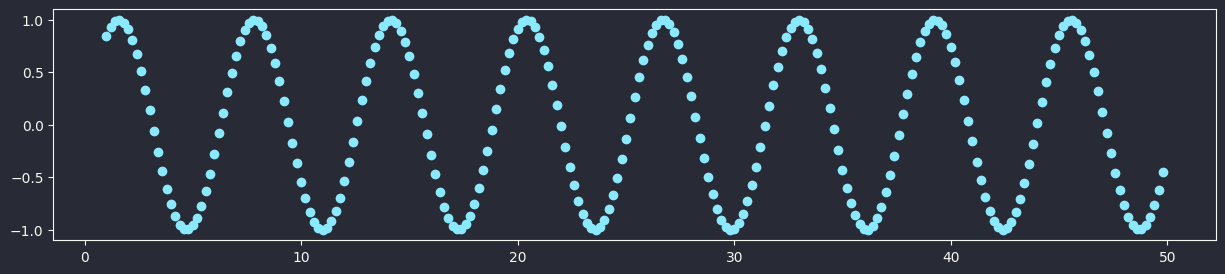

In [85]:
x = torch.arange(1, 50, 0.2)
y = torch.sin(x)

plt.figure(figsize=(15, 3))
plt.scatter(x, y)



w = tensor(nan)
b = tensor(nan)


C:\Users\daith\AppData\Local\Temp\ipykernel_7060\3955176852.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(w - alpha * dw, requires_grad=True)
C:\Users\daith\AppData\Local\Temp\ipykernel_7060\3955176852.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b - alpha * db, requires_grad=True)


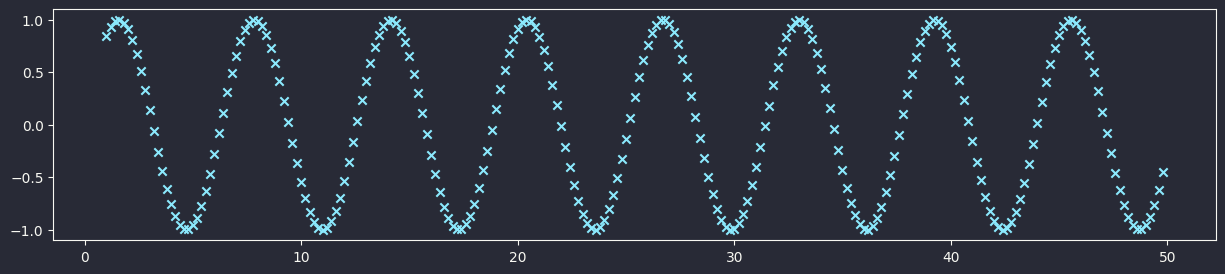

In [126]:
w, b = learn(x, y)
y_pred = torch.sin(w * x + b)

print("\n")

print(f"{w = }")
print(f"{b = }")

plt.figure(figsize=(15, 3))
plt.scatter(x, y, marker='x')
plt.plot(x, y_pred)

In [114]:
r2_score(y, y_pred)

-0.96674212727626